In [1]:
pip install --upgrade Pillow


     ---------------------------------------- 2.6/2.6 MB 626.9 kB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.3.0
    Uninstalling Pillow-9.3.0:
      Successfully uninstalled Pillow-9.3.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arcade 2.6.17 requires pillow~=9.3.0, but you have pillow 11.0.0 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


---------

In [10]:
ads = r"Y:\Canon 2kD\Uploaded\Import 2\IMG_2958.JPG"

In [14]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS

def get_focal_length(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Extract EXIF data
    exif_data = img._getexif()
    
    if not exif_data:
        print("No EXIF data found.")
        return None

    # Create a dictionary to hold the EXIF data
    exif_dict = {}
    for tag_id, value in exif_data.items():
        tag = TAGS.get(tag_id, tag_id)
        exif_dict[tag] = value

    # Get the focal length
    focal_length = exif_dict.get('FocalLength')
    
    if focal_length:
        # Focal length is usually a tuple (numerator, denominator)
        if isinstance(focal_length, tuple):
            focal_length_value = focal_length[0] / focal_length[1]
            return focal_length_value
        else:
            return focal_length
    else:
        print("Focal length not found in EXIF data.")
        return None

focal_length = get_focal_length(ads)

if focal_length is not None:
    print(f"Focal Length: {focal_length} mm")


--------

In [32]:
import os
from tqdm import trange

import seaborn as sns
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.pyplot import figure

In [84]:
ads_list = [r"Y:\Canon 2kD\Uploaded\Import 2",
            r"Y:\Canon 2kD\Uploaded\Import 2\Moscow Visit #1",
            r"Y:\Canon 2kD\Uploaded\Import 3",
            r"Y:\Canon 2kD\Uploaded\Import 4",
            r"Y:\Canon 2kD\Uploaded\Import 5",
            r"Y:\Canon 2kD\Uploaded\Import 6",
            r"Y:\Canon 2kD\Uploaded\Import 7\Trip to Mini Kizhi & Nevsky lec",
            r"Y:\Canon 2kD\Uploaded\Import 7\Trip to Moscow #4\P1",
            r"Y:\Canon 2kD\Uploaded\Import 7\Trip to Moscow #4\P2",
            r"Y:\Canon 2kD\Uploaded\Import 8",
            r"Y:\Canon 2kD\Uploaded\Import 9",
            r"Y:\Canon 2kD\Uploaded\Import 10\Bridges Opening (White Nights)",
            r"Y:\Canon 2kD\Uploaded\Import 10\Meeting Даша",
            r"Y:\Canon 2kD\Uploaded\Import 10\Random Day at near Lomonosova",
            r"Y:\Canon 2kD\Uploaded\Import 10\Scarlet Sails Rehersal",
            r"Y:\Canon 2kD\Uploaded\Import 10\Vyborg\Part_1",
            r"Y:\Canon 2kD\Uploaded\Import 10\Vyborg\Part_2",
            r"Y:\Canon 2kD\Uploaded\Import 10\Vyborg\Part_3",
            r"Y:\Canon 2kD\Uploaded\Import 12",
            r"Y:\Canon 2kD\Uploaded\mir 1",
            r"Y:\Canon 2kD\Uploaded\Retro Transport Day",
            r"W:\2KD_2\Import 11",
            r"W:\2KD_2\Import 13\Fish Eye Day Izmailovskaya Church",
            r"W:\2KD_2\Import 13\Lunch with Fahri",
            r"W:\2KD_2\Import 13\Rail Muesum & Narva Gate",
            r"W:\2KD_2\Import 14\JPG",
            r"W:\2KD_2\Import 15",
            r"W:\2KD_2\Import 16\Tikvin Trip",
            r"W:\2KD_2\Import 17\Weekend",
            r"W:\2KD_2\Import 18\Images",
            r"W:\2KD_2\Import 19\Gatchina with Dasha\Part 1",
            r"W:\2KD_2\Import 19\Gatchina with Dasha\Part 2",
            r"W:\2KD_2\Import 19\Near IMCH",
            r"W:\2KD_2\Import 19\Push Gora",
            r"W:\2KD_2\Import 19\With Dasha to some Monastery",
            r"W:\2KD_2\Import 20\ETC",
            r"W:\2KD_2\Import 20\Ivangorod",
            r"W:\2KD_2\Import 20\Kingisepp",
            r"W:\2KD_2\Import 20\Winter Exploration November",
            r"W:\2KD_2\Import 21\Kursk Trip\P1",
            r"W:\2KD_2\Import 21\Kursk Trip\P2",
            r"W:\2KD_2\Import 21\Kursk Trip\P3",
            r"W:\2KD_2\Import 21\New Year Meets",
            r"W:\2KD_2\Import 21\Pirozhki",
            r"W:\2KD_2\Import 21\Sigma 70_200 Test",
            r"W:\2KD_2\Import 21\Smolny Sobor",
            r"W:\2KD_2\Import 21\Sortavalla & Ruskeala",
            r"W:\2KD_2\Import 22\Artic Museum",
            r"W:\2KD_2\Import 22\Igora Drive - Drift Cup",
            r"W:\2KD_2\Import 22\Sunset at Pulkovo",
            r"W:\2KD_2\Import 22\Velikye Nogorod (Maslenitsa)",
            r"Y:\Canon 2KD_3\Import 23\Fire Station in Vaslievsky Island",
            r"Y:\Canon 2KD_3\Import 23\Lodelnoye Pole",
            r"Y:\Canon 2KD_3\Import 23\Luga",
            r"Y:\Canon 2KD_3\Import 23\Primorsk",
            r"Y:\Canon 2KD_3\Import 23\Rogavka Rail Museum",
            r"Y:\Canon 2KD_3\Import 23\Spring Lomonosov",
            r"Y:\Canon 2KD_3\Import 23\Spring Peterhoff",
            r"Y:\Canon 2KD_3\Import 24\Ice Cream Festival AND Drone",
            r"Y:\Canon 2KD_3\Import 24\Mandrogi AND Jupyter 37a",
            r"Y:\Canon 2KD_3\Import 24\MIR MC 20 Test",
            r"Y:\Canon 2KD_3\Import 24\MMK\P1",
            r"Y:\Canon 2KD_3\Import 24\MMK\P2",
            r"Y:\Canon 2KD_3\Import 24\MMK\P3",
            r"Y:\Canon 2KD_3\Import 24\Talab - Zalit Ostrov",
            r"Y:\Canon 2KD_3\Import 24\Velikye Luki - Sebez\R1",
            r"Y:\Canon 2KD_3\Import 24\Velikye Luki - Sebez\R2",
            r"Y:\Canon 2KD_3\Import 24\Velikye Luki - Sebez\R3",
            r"Y:\Canon 2KD_3\Import 24\Velikye Luki - Sebez\R4",
            r"Y:\Canon 2KD_3\Import 24\Velikye Luki - Sebez\R5",
            r"Y:\Canon 2KD_3\Import 25\Ladoga northern Lights",
            r"Y:\Canon 2KD_3\Import 25\Moving_In_Serebreistti",
            r"Y:\Canon 2KD_3\Import 25\Pehcory_Izborsk\P1",
            r"Y:\Canon 2KD_3\Import 25\Pehcory_Izborsk\P2",
            r"Y:\Canon 2KD_3\Import 25\Pehcory_Izborsk\P3",
            r"Y:\Canon 2KD_3\Import 25\Vyborg Monrepo",
            r"Y:\Canon 2KD_3\Import 26\Snow in the night",
            r"Z:\Canon 2KD_4\Christmas Tree",
            r"Z:\Canon 2KD_4\Import 27\Nizhny_Novgorod_Trip\P1",
            r"Z:\Canon 2KD_4\Import 27\Nizhny_Novgorod_Trip\P2",
            r"Z:\Canon 2KD_4\Import 27\Nizhny_Novgorod_Trip\P3",
            r"Z:\Canon 2KD_4\Pargolovo_Cross\P1",
            r"Z:\Canon 2KD_4\Pargolovo_Cross\P2"]

In [48]:
ads = r'Y:\Canon 2kD\Uploaded\Import 2'

In [54]:
elements = os.listdir(ads)

In [51]:
my_dict = {}
for i in range(0,301
    my_dict[i] =0

In [85]:
my_dict = {}
for i in range(0,301):
    my_dict[i] =0

for j in trange(len(ads_list)):
    
    ads = ads_list[j]
    elements = os.listdir(ads)

    for i in range(len(elements)):

        if ".JPG" in elements[i] and ".dop" not in elements[i]:

            focal_length = get_focal_length(ads+'\\'+elements[i])
            my_dict[focal_length] = my_dict[focal_length] + 1

    
    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 83/83 [03:16<00:00,  2.36s/it]


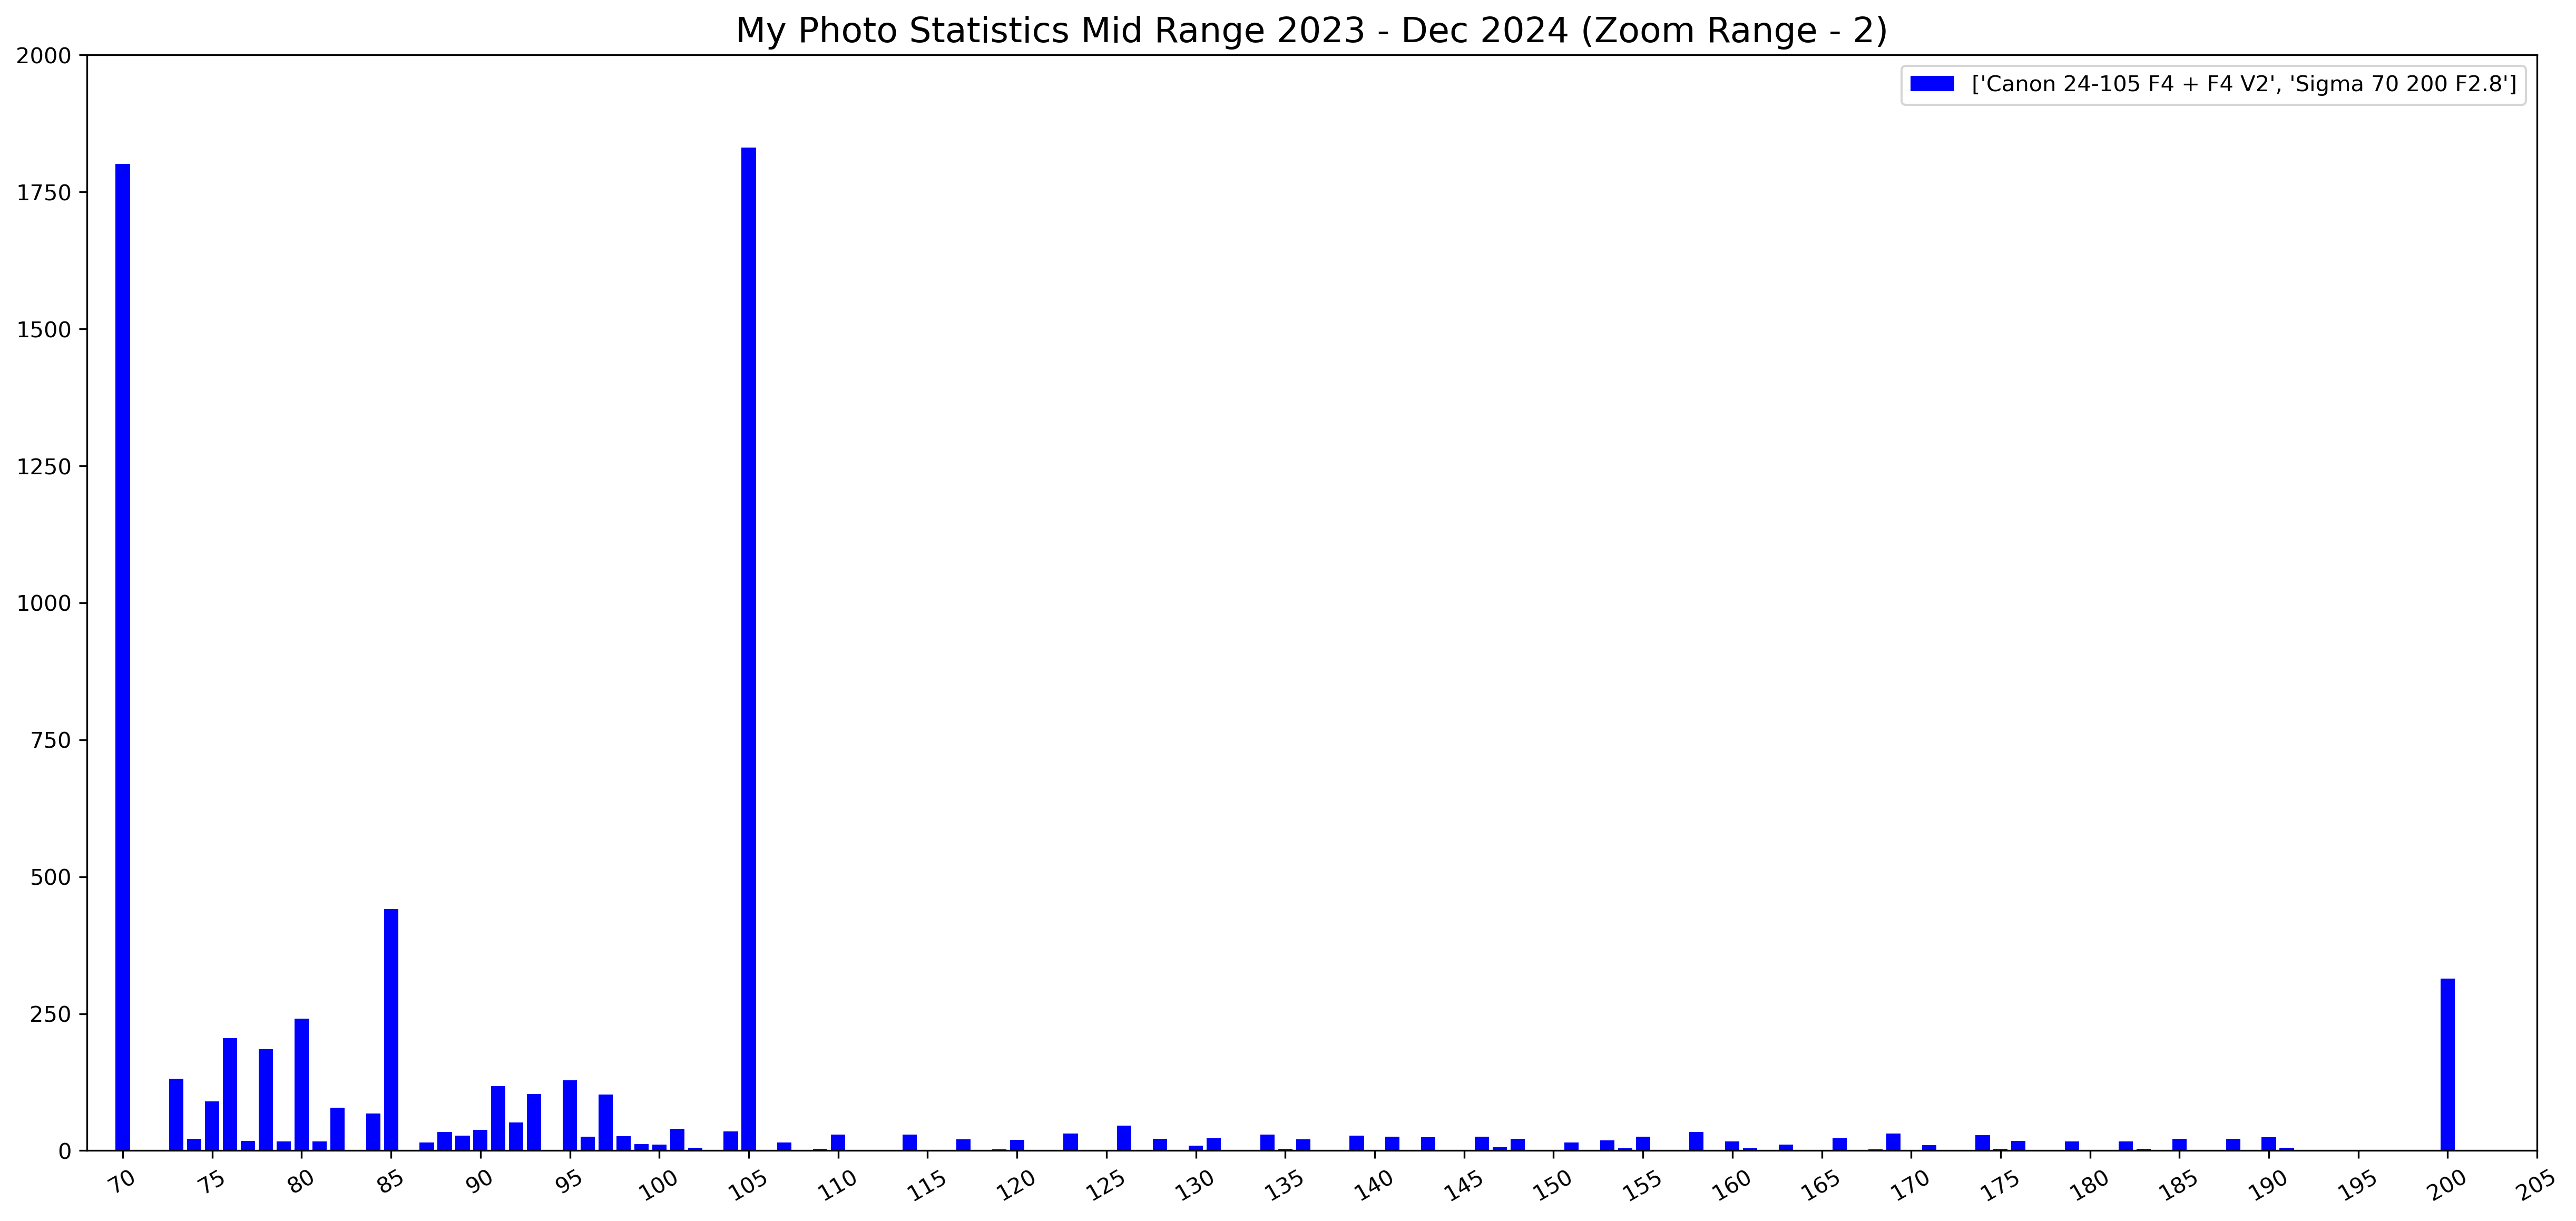

In [123]:
fig = plt.figure(figsize=(20, 9), dpi = 300) 

plt.bar(my_dict.keys(), my_dict.values(), color = 'blue', label = ["Canon 24-105 F4 + F4 V2", "Sigma 70 200 F2.8"])

plt.xticks(range(0,301,5),fontsize = 10,rotation = 30)
plt.xlim(68,205)
plt.ylim(0,2000)
#plt.yticks(range(30,110,10),fontsize = 16)

plt.title("My Photo Statistics Mid Range 2023 - Dec 2024 (Zoom Range - 2)", fontsize = 16)
plt.legend()

plt.savefig("Shots_Statistics_Jan_2025_L3.svg",bbox_inches='tight')
plt.show()